## Example - 3 day split with periodization

This notebook shows features of [streprogen](https://github.com/tommyod/streprogen), the Python strength program generator.

- [GitHub repository](https://github.com/tommyod/streprogen)
- [Python Package Index (PyPI)](https://pypi.org/project/streprogen/)
- [Report issues or make feature requests](https://github.com/tommyod/streprogen/issues)

Contributions to the code are welcome. :)

In [1]:
!pip install streprogen matplotlib --quiet

### Imports

In [2]:
from streprogen import Program, reps_to_intensity, progression_diffeq
import matplotlib.pyplot as plt
import functools

### A custom periodization function

Let's replace the default progression function with a wave function.

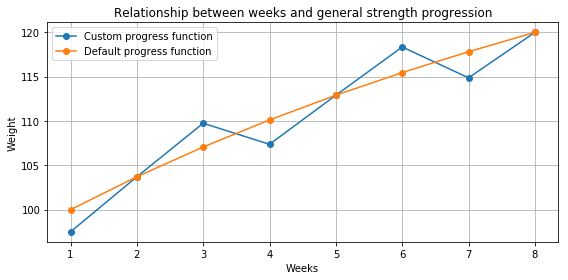

In [3]:
plt.figure(figsize=(8, 4))
plt.title("Relationship between weeks and general strength progression")

duration = 8
weeks = list(range(1, duration + 1))

def progress(weeks, start_weight, final_weight, start_week, final_week):
    """Custom progress function.
    
    You can define any function here, but it must have the signature:
    
        func(weeks, start_weight, final_weight, start_week, final_week)
    """
    # Setting k=0 below makes the function perfectly linear
    # Setting k>0 makes the function increasingly non-linear
    base = progression_diffeq(weeks, start_weight, final_weight, start_week, final_week, k=1)
    period = 3
    amplitude = 0.05
    
    return (1 + amplitude*((weeks - 1) % period - period // 2) / (period - 1))*base

custom = [progress(w, start_weight=100, final_weight=120, start_week=1, final_week=duration) for w in weeks]
default = [Program._default_progression_func(w, start_weight=100, final_weight=120, start_week=1, final_week=duration) for w in weeks]

# Plot the two functions
plt.plot(weeks, custom, '-o', label="Custom progress function")
plt.plot(weeks, default, '-o', label="Default progress function")
plt.xlabel("Weeks"); plt.ylabel("Weight")
plt.legend(); plt.grid(); plt.tight_layout()

### Program setup

Below is the code creating the program.

- It's a relatively straightforward split program, mostly using defaults.
- You will have to add your own values for the exercises, i.e. the weights.
- We demonstrate some more advanced features and commented on them.

In [4]:
program = Program(
    # The name of the training program
    name='3DaySplitWithPeriodization',
    duration=duration,
    # The baseline number of repetitions per dynamic exercise.
    reps_per_exercise=22,
    # Units for the weights, typically 'kg', 'lbs' or '' (empty)
    units='kg',
    # What the weights are rounded to (closest multiple of this number)
    round_to=5,
    # Override the default progression function with out own
    progression_func=progress
    
)

# Use the random module to generate some random set/rep schemes
import random
random.seed(123)

def random_set_ret_scheme(week):
    return random.choice(["3x12", "4x10", "5x8"])

# --------------------------------------------------
# ---- INPUT YOUR OWN 1RMs AS START WEIGHTS BELOW --
# ---- Carefully assess the program, then go back --
# ---- and adjust further if necessary.           --
# --------------------------------------------------

with program.Day("Day A - Chest/tri"):
    program.DynamicExercise(name="Bench", start_weight=100)
    
    # BW stands for body weight, so if you weigh 80kg and it says 90kg,
    # then you add 10kg in a belt
    program.DynamicExercise(name="Dips", start_weight=105, min_reps=4)
    # For this specific exercise we change the rounding
    program.DynamicExercise(name="Incline bench", start_weight=80, round_to=2.5)
    program.StaticExercise("French press", random_set_ret_scheme)
    
with program.Day("Day B - Back/bi"):
    program.DynamicExercise(name="Light squats", start_weight=100, min_reps=4)
    # Below we decrease the reps and increase the intensity of deadlifts a little
    program.DynamicExercise(name="Deadlifts", start_weight=140, reps=15, max_reps=5, min_reps=2, intensity=85)
    program.DynamicExercise(name="Seated rows", start_weight=90, min_reps=5)
    program.StaticExercise("Chin ups", "4x8")
    program.StaticExercise("Curls", random_set_ret_scheme)
    
with program.Day("Day C - Legs"):
    program.DynamicExercise(name="Heavy Squats", start_weight=120)
    program.DynamicExercise(name="Bench", start_weight=105)
    program.DynamicExercise(name="Stiffleg DLs", start_weight=100)
    program.StaticExercise("Chin ups", "3x10")
    program.StaticExercise("Claf raises", random_set_ret_scheme)

### Render the program

In [5]:
# Do the computations and render a program. Might take a few seconds.
program.render()

### Print and save the program

In [6]:
print(program)

----------------------------------------------------------------
Program: 3DaySplitWithPeriodization

Program parameters
  duration: 8
  reps_per_exercise: 22
  intensity: 80
  units: kg
----------------------------------------------------------------
Exercise information
  Day A - Chest/tri
   Bench           100kg -> 112.0kg
    reps: [3, 8]   weekly inc.: 1.5%
   Dips            105kg -> 117.6kg
    reps: [4, 8]   weekly inc.: 1.5%
   Incline bench    80kg -> 89.6kg 
    reps: [3, 8]   weekly inc.: 1.5%
   French press    3x12
  Day B - Back/bi
   Light squats    100kg -> 112.0kg
    reps: [4, 8]   weekly inc.: 1.5%
   Deadlifts       140kg -> 156.8kg
    reps: [2, 5]   weekly inc.: 1.5%
   Seated rows      90kg -> 100.8kg
    reps: [5, 8]   weekly inc.: 1.5%
   Chin ups        4x8
   Curls           4x10
  Day C - Legs
   Heavy Squats    120kg -> 134.4kg
    reps: [3, 8]   weekly inc.: 1.5%
   Bench           105kg -> 117.6kg
    reps: [3, 8]   weekly inc.: 1.5%
   Stiffleg DLs    

### Export the program as `.html` or `.tex`, then to `.pdf`

A `.html` file can be printed directly from your browser, or printed to a `.pdf` from your browser.

In [7]:
# Save the program as a HTML file
with open('3DaySplitWithPeriodization.html', 'w', encoding='utf-8') as file:
    # Control table width (number of sets) by passing the 'table_width' argument
    file.write(program.to_html(table_width=8))

In [8]:
# Save the program as a TEX file
with open('3DaySplitWithPeriodization.tex', 'w', encoding='utf-8') as file:
    # Control table width (number of sets) by passing the 'table_width' argument
    file.write(program.to_tex(table_width=8))

Use a `.tex` to generate `.pdf` if you have LaTeX installed, or use:
    
- [latexbase.com](https://latexbase.com/) from your browser.

In [9]:
# If you have LaTeX installed on your system, you can render a program to .tex
# Alternatively, you can paste the LaTeX into: https://latexbase.com/
print(program.to_tex(table_width=8))

% -----------------------------------------------
% Package imports
% -----------------------------------------------
\documentclass[12pt, a4paper]{article}% 'twoside' for printing
\usepackage[utf8]{inputenc}% Allow input to be UTF-8
\usepackage[margin = 2cm]{geometry}% May be used to set margins

% -----------------------------------------------
% Document start
% -----------------------------------------------

\begin{document}
\large

\section*{Program: 3DaySplitWithPeriodization}

This program was made using \verb|streprogen|,
the Python strength program generator.
The latest version can be found at \\
\verb|https://pypi.python.org/pypi/streprogen/|.


\section*{Program parameters}
\begin{tabular}{l|l}
	\textbf{Parameter} & \textbf{Value} \\ \hline
	\verb|duration|             & 8 \\
	\verb|reps_per_exercise|    & 22 \\
	\verb|intensity|            & 80 \\
	\verb|units|                & kg
\end{tabular}


\section*{Exercise information}
\begin{tabular}{llllll}
    \textbf{Exercise}